## Seq2seq의 문제와 Attention 등장
- Source 문장을 전부 고정된 크기의 하나의 벡터에 압축해야 하는 문제점이 있었다.
- 이 때문에 Source 문장의 전체를 반영하기엔 데이터 손실이 있었다.
- 또한 최종 압축 벡터에 Source 문장의 마지막 부분만 많이 반영되는 문제가 있었다.
- RNN의 구조 특성상 역전파를 사용시 앞단 Layer의 Gradient는 갱신 되지 않는 Gradient Vanishing 문제가 일어나 Layer가 깊어질 수록 학습이 잘 되지 않는 현상이 나타 났다.
- 이러한 문제 때문에 RNN 아키텍쳐에 의존하지 않는 Attention 기법이 등장하게 되었으며 이를 활용하여 Transformer 아키텍쳐가 등장하게 됐다.
- Attention의 등장 으로 입력 Sequence 전체에서 정보를 추출 할 수 있게 되었다.


#### Seq2Seq 모델의 한계점

![image](https://github.com/choibigo/temp/assets/38881179/108087f9-03d4-4bf0-a088-ba830f9848d8)

- Seq2Seq는 RNN Layer들을 통과 시켜 고정된 크기의 Context Vector에 입력 Sequence의 모든 정보를 압축한다.
- 이러한 압축 과정에서 RNN의 특성상 Hidden State가 계속 갱신 되며 앞쪽의 입력 데이터 정보를 잃어 버리는 현상이 나타난다.
- 이후 Decoder에 Context Vector를 첫번쨰 Hidden State로 하여 문장을 생성한다.
- Decoder에서도 첫 번쨰 RNN에만 Context Vector가 입력 되기 때문에 Layer가 깊어 질 수록 Context Vector의 정보를 잃어버릴 수 있다. => 이를 해결하기 위해 Decoder의 모든 RNN에서 Context Vector를 참고하게 할 수도 있다.

#### Attention의 등장
- 하나의 Context Vector로 문장을 압축하면 데이터 손실이 발생한다. 
- 그렇 다면 소스 문장에서의 모든 출력을 Decoder의 입력으로 주면 어떨까? 라는 아이디어에서 Attention이 등장 했다.
- 소스 문장의 모든 출력을 저장 하여 소스 문장의 전반적인 정보를 저장할 수 있으며 Decoder에서는 단어를 만들때 이러한 행렬을 참조할 수 있다.

![image](https://github.com/choibigo/temp/assets/38881179/9e505cec-468d-4ed9-9ff4-02717038e2bc)

- 첫 번쨰 RNN의 입력으로 context vector가 입력 되는 동시에 문장 전체를 반영하고 있는 행렬(W)도 모든 RNN에 입력된다.
- 이 결과 Decoder에서 하나의 단어를 만들 때 Source 문장을 표현하는 모든 Vector을 참고하여 다음 단어를 생성할 수 있다.

![image](https://github.com/choibigo/temp/assets/38881179/1e4d87ad-afa2-42ce-a9aa-ecdcec12bc29)

- i: 디코더가 1개의 단어를 만들때 각각의 Index
- j: 소스 문장의 단어들을 벡터로 표현한 행렬의 Index
- Energy: Decoder는 출력 단어를 만들 때 마다 모든 소스 문장의 단어 벡터(hj)를 고려한다, S는 decoder의 이전 hidden state 벡터 이다. => 그 결과 이번에 만들어야할 벡터가 어떤 h(소스 문장 단어들)와 연관성이 높은지 판단할 수 있다.
- Weight: Energy를 softmax 함수를 통과 시켜 실제 어떤 단어를 출력할지 선택한다.

![image](https://github.com/choibigo/temp/assets/38881179/f713dc6b-0f92-4688-94ea-3cf481507ef2)

- Decoder에서 현재 단어를 만들기 위해서는 이전 Hidden State와 Encoder의 모든 hidden state를 고려하게 된다.
- a는 Decoder의 이전 hidden state와 encoder의 모든 hidden state에 대해 비율(softmax 통과 값으로 만들어낼 단어가 소스 문장 단어들중 어떤 단어와 관계있는지 관계의 정도를 의미한다.)을 구할 수 있게 된다.
- weighted sum: 관계의 정도를 알았으니 그 정도를 원래 Encoder 모든 단어 Hidden state에 곱해줘서 실제 데이터에 관계의 정도를 반영해 준다.
- Encoder의 모든 hidden state와 이전 Decoder의 hidden state의 관계도 따짐 (softmax 통과) => 관계의 정도를 실제 데이터에 곱하여 관계 정도 반영 => Decoder에서 이전 hidden state + 곱해진 관계 정도를 입력으로 하여 단어를 만듬
- 이를 통해 각각의 output word가 어떤 source 이미지를 주로 참고 했는지 알 수 있게 된다.

## Transformer : Attention Is ALL you Need
- CNN이나 RNN 대신 Attention 기법만 잘 활용하면 좋은 성능을 얻을 수 있다.

![image](https://github.com/choibigo/temp/assets/38881179/c4d0740e-8e4c-4774-beeb-409968d94184)

- Transfoermer는 RNN이나 CNN을 사용하지 않기 때문에 순서에 대해서 고려하지 못한다, 순서를 고려하기 위해 Positional Encoding을 사용한다.
- 크게 인코더 디코더 구조를 가지고 있으며 Attention 과정을 여러 레이어에서 반복한다.

#### 트랜스포머의 동작 원리: 입력 값 임베딩(Embedding)

![image](https://github.com/choibigo/temp/assets/38881179/35e0c137-9a86-4605-9476-edd60b606c26)

- 입력 단어들의 차원은 전체 입력 데이터의 유니크한 단어 개수 이다, 이러한 차원을 가지며 원핫 인코딩 형태로 단어가 표현 된다.
- Embedding Layer를 통과 시켜 차원을 축소하며 더욱 Continuous한 값으로 만들어 준다.
- 만약 Embedding후 RNN을 사용한다면 RNN을 사용하는 것 만으로 데이터의 순서를 고려해 주는 것이 된다, 그러나 Transformer는 RNN을 사용하지 않기 때문에 순서를 고려하기 위해 Positional Encoding을 사용한다.
- Input Emgedding Matrix와 동일한 차원을 갖는 Positional Encoding Matrix를 원소별 합을 통해 위치 정보를 반영해 준다.

#### 트랜스포머의 동작 원리: 인코더(Encoder)
- 임베딩이 끝난 Matrix를 Attention에 입력한다.

![image](https://github.com/choibigo/temp/assets/38881179/510a5278-f660-405c-a4e3-158cf2f47ef2)

- Encoder 단계에서는 self-attention으로 문장에서 단어가 어떤 단어와 관계 있는지를 파악한다, 이를 통해 문맥에 대한 정보를 파악하도록 한다.
- 성능 향상을 위해서 Residual Learning을 사용한다: 입력에 대해서 다음 다음 layer와 차이만 학습하도록 하여 학습 난이도를 낮추며 Gradient Vanshing 완화하여 Layer를 깊게 쌓을 수 있다.

![image](https://github.com/choibigo/temp/assets/38881179/c925d4cf-8a61-4cb2-9448-675c3a67f268)

- Attention + (Add + Normalization) + Feedforward Layer + (Add + Normalization)를 하나의 Layer로 하여 여러 Layer를 쌓는다.
- 각각의 Layer는 서로 다른 파라미터를 갖는다.

![image](https://github.com/choibigo/temp/assets/38881179/f44130bd-53e3-4ee1-909b-b4f6315ae38e)

- Encoder의 가장 마지막에 Decoder의 입력으로 들어가게 된다, Decoder에서 단어를 생성할 때 소스 문장에서 어떤 부분을 주목해서 만들지 알려주기 위함이다.
- Decoder의 1개 Layer에서는 2개의 Attention Layer가 존재 하며 1번쨰 layer는 self-atteion을 수행하여 단어의 맥락을 파악하며 2번째 layer에서는 self-attention결과와 Encoder의 Output과 함께 연산하여 단어를 생성한다.

![image](https://github.com/choibigo/temp/assets/38881179/e3f3f267-625d-4cba-aa98-bb7ef9fac4e8)

- Encoder와 Decoder의 Layer는 보통 동일하게 한다.
- 마지막 Encoder의 결과가 각 Decoder의 layer에 입력되게 된다. 
- RNN에 데이터를 입력 할 때는 순차적으로 입력해야 하므로 병렬연산에 대한 한계가 있었다, 그러나 Attention 기법을 이용하면 입력 데이터를 한번에 입력 하기 때문에 병렬연산이 가능하여 연산 복잡도를 낮출수 있다.
- 

#### 트랜스포머의 동작 원리: Attention

![image](https://github.com/choibigo/temp/assets/38881179/b255c4ce-324c-46ae-95fa-d564c9fa581a)

- 특정단어가 어떠한 단어들과 어느정도의 연관성을 가지는지를 파악해야 한다.
  - I am a teacher을 self-attention 연산을 수행하고 첫번째 I와 다른 단어들의 관계를 파악 할때 I가 Query가 되며 나머지 I, am, a teacher가 key가 된다.
  - Query와 key를 연산 한뒤에 최종적으로 Value와 연산하여 최종적인 Attention Value를 구할수 있다.
- 문장이 입력되면 Query, key, Value를 만든다.(입력 데이터에 대해 Q, K, V에 대한 Weight를 곱해 만들 수 있다.), 이러한 Q, K, V를 H개(다수 개) 만든다.
- 이러한 이유는 H개의 서로 다른 Attention concept를 학습하도록 하기 위해서 이다. (여러 관점에서 바라볼 수 있도록 한다.)
- 서로 다른 h개의 head는 서로 다른 Q, K, V를 받아서 Attention 연산을 수행한 이후 Concat을 통해 붙인 이후 Linear Layer를 거쳐서 입력값과 출력값의 차원이 같도록 만들어 준다. 
- self-attention에서는 1개의 문장에서만 파악 하면 되므로 Q, K, V가 동일한 입력 데이터에서 생성된다.
- 그러나 Decoder의 attention에서는 소스문장과 입력의 관계를 파악하고 싶기 때문에 Q는 Decoder의 입력이 되고 K, V는 Encoder의 output이 된다.

#### 트랜스포머의 동작 원리: Query, Key, Value
- 어텐션을 위해서 Query, Key, Value 가 필요하다.
- 각 단어는 각각의 Weight가 존재하여 Embedding을 이용해 생성할 수 있다.

![image](https://github.com/choibigo/temp/assets/38881179/b62450b6-cb42-44bb-95a3-f371a03d35f8)
- dmodel: 입력 Embedding 차원(그림에서 4)
- h: head의 개수(그림에서는 2)
- 최종적으로 4개의 차원을 가진 벡터가 dmodel/h(4/2=2) 차원이 된다, 이 와 같은 차원 변경을 위해서 Weight는 (Embedding 차원 x Emgedinng 차원/h 개수)=(4x2) 크기가 되며 연산 이후 2차원 Q, K, V가 생성된다.
- 각 단어에 대해 Q, K, V를 구할 수 있다.

![image](https://github.com/choibigo/temp/assets/38881179/7b341922-86f7-45ff-a567-f26834fee3ab)

- Q와 K를 곱하여 3x3 크기의 Attention Energies(Q와 K의 유사도)를 수할 수 있다.
- 이후 softmax 통과후 Value를 곱해 Attention을 구한다.
- Query는 모든 Key와 행렬곱 연산하여 유사도 정도를 파악한다 => (차원)^2 으로 나눔 => Softmax 통과 => Value와 곱 => 최종 Attention Score 

#### 트랜스포머의 동작 원리: Mask Matrix
- 마스크 행렬을 이용해 특정 단어는 무시할 수 있도록 한다.
- 마스크값으로 음수 무한의 값을 넣어 softmax함수의 출력이 0%에 가까워지도록 한다.
- Decoder에서는 단어를 생성하는 역할을 한다 실제 단어를 생성할 때는 나보다 앞선 위치의 단어는 알지 못한다 이를 반영하기 위해 생성 이후의 시간의 단어들에 대해서 Mask를 씌운다.

![image](https://github.com/choibigo/temp/assets/38881179/60580212-ba10-4674-ab77-7d7621557ef0)

- head 마다 attension을 만들게 되며 이렇게 만들어진 attention을 concat이후 Linear layer를 통과시켜 원래 입력 차원과 동일하게 만든다.

#### 트랜스포머의 동작 원리: Attention 종류

![image](https://github.com/choibigo/temp/assets/38881179/e65dfbf5-6ba5-413e-9e76-71d562cb7702)

- Encoder Self-Attention: 각각의 단어가 같은 문장의 어떤 단어와 연관이 있는지 파악한다.
- Masked Decoder self-Attension : Decoder에서 단어를 생성할 때는 앞쪽에 등장한 단어만 참고 하도록 한다. (실제 문장을 만들때 뒷쪽에 어떤 단어가 올지 모르니 Attention 할 수 없다 따라서 동일한 상황을 재현하기 위해 Mask를 사용한다.)
- Encoder-Decoder Attention : Query가 Decoder에 있고 Encoder에 Key와 value가 있어 Decoder에서 단어를 생성할때 소스 문장의 어떤 부분을 참고해야 하는지 파악한다.

#### 트랜스포머의 동작 원리: Self-Attention
- Self-Attention은 인코더와 디코더 모두에서 사용한다.
- 동일한 문장에서 각 단어가 다른 어떤 단어와 연관성이 높은지 계산할 수 있다.

#### 트갠스포머의 동작 원리: Positional Encoding
- Positional Encoding은 주기함수를 활용한 공식을 사용한다.
- 각 단어의 상대적인 위치 정보를 네트워크에게 알려준다.

![image](https://github.com/choibigo/temp/assets/38881179/149a9410-0cd4-41fc-9633-e7d3a329643a)

- Positional Encoding의 차원 크기와 Embedding 이후 차원은 동일하다.
- 빨강색 동그라미는 (0,3)이된다, 0번째 단어의 3번째 Embedding이기 때문이다. 
- 주기 함수를 통과시켜 입력값과 동일한 차원을 가지는 Positional Encoding을 만들 수 있게 된다.
- Embedding과 원소별 더해준 뒤에 Attention의 입력으로 들어가게 된다.

#### 참조
- [링크](https://www.youtube.com/watch?v=AA621UofTUA)

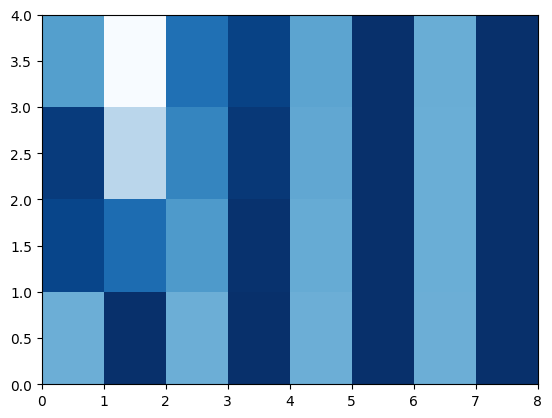

In [21]:
import math
import matplotlib.pyplot as plt

n = 4 # Data의 개수
dim = 8 # Data가 Embedding 되는 차원과 

def get_angles(pos, i , dim):
    # data의 index와 차원수를 연산해 주기 함수의 입력(각도)을 구한다.
    angles = 1 / math.pow(1000, (2 * (i//2)) / dim)
    return pos*angles

def get_positional_encoding(pos, i, dim):
    # 짝수인 경우 sin, 홀수인 경우 cos 함수를 통해서 위치를 지정한다.
    if i % 2 == 0:
        return math.sin(get_angles(pos, i ,dim))
    return math.cos(get_angles(pos, i, dim))


result = [[get_positional_encoding(i, j, dim) for j in range(dim)] for i in range(n)]
'''
- 순서에 대한 정보를 주기함수 연산을 통해 나타낸다. 
- 주기 함수에 입력될 각도를 구할땐 전체 data에 대한 index와 data(문장) 내 순서를 고려하여 각도를 구한다.
- 이와 같은 연산을 통해 Embedding Matrix와 동일한 차원의 Positional Encoding Matrix를 얻는다.
- Positional Encoding Matrix는 데이터 순서에 대한 정보를 담고 있고 이후 Embedding Matrix와 원소별 합을 통해 순서를 고려할 수 있게 한다.
'''

plt.pcolormesh(result, cmap='Blues')

## Code

#### BLEU Score
- 학습 결과를 평가하기 위해 BLEU Score를 사용한다.
- n-gram 기반으로 번역한 문장이 실제 문장과 비교 했을때 얼마나 유사한지 평가하는 평가 척도중 하나이다.

#### Preprocessing
- spaCy : Tokenization, Tagging 등의 전처리 기능을 사용하기 위한 라이브러리
- 영어와 독일어 전처리 모듈 설치

```bash
pip install spacy
python -m spacy download en
python -m spacy download de
```
- field : 데이터셋에 대한 구체적인 전처리 내용을 명시한다.
- Multi30K : 영어-독어 번역 데이터

In [101]:
import spacy
from torchtext.data import Field, BucketIterator
from torchtext.datasets import Multi30k

spacy_en = spacy.load('en_core_web_sm') # 영어 Tokenization
spacy_de = spacy.load('de_core_news_sm') # 독일어 Tokenization

# region spacy_test
# tokenized = spacy_en.tokenizer("I am a graduate student.") # 문장을 토큰으로 바꿔준다.

# for i, token in enumerate(tokenized):
#     print(f"인덱서 {i} : {token.text}")
# endregion

def tokenize_de(text):
    return [token.text for token in spacy_de.tokenizer(text)]

def tokenize_en(text):
    return [token.text for token in spacy_en.tokenizer(text)]


SRC = Field(tokenize = tokenize_de, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True,
            batch_first=True)

TRG = Field(tokenize = tokenize_en, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True,
            batch_first=True)
'''
- init_token: 시작 토큰
- eos_token: 종료 토큰
- lower: 모든 문자 소문자 화 여부
- batch_first: 미니 배치 차원을 맨 앞으로 하여 데이터륿 불러올 것인지 여부(False가 기본), Transformer를 학습할 때는 Batch가 맨앞으로 오게 하는것이 기본이다.
'''


train_dataset, valid_dataset, test_dataset = Multi30k.splits(exts=('.de', '.en'), fields=(SRC, TRG))

In [102]:
print(f"Train Dataset Length: {len(train_dataset.examples)}")
print(f"Validation Dataset Length: {len(valid_dataset.examples)}")
print(f"Test Dataset Length: {len(test_dataset.examples)}")

# print(vars(train_dataset.examples[30])['src'])
# print(vars(train_dataset.examples[30])['trg'])
# print(vars(train_dataset[30]))

SRC.build_vocab(train_dataset, min_freq=2)
TRG.build_vocab(train_dataset, min_freq=2)
# 최소 2번 이상 나온 단어들로 Vocabulary만들기

print(f"len(SRC): {len(SRC.vocab)}")
print(f"len(TRG): {len(TRG.vocab)}")

print(TRG.vocab.stoi["abcabc"]) # 없는 단어: 0
print(TRG.vocab.stoi[TRG.pad_token]) # 패딩(padding): 1
print(TRG.vocab.stoi[""]) # : 2
print(TRG.vocab.stoi[""]) # : 3
print(TRG.vocab.stoi["hello"])
print(TRG.vocab.stoi["world"])


Train Dataset Length: 29000
Validation Dataset Length: 1014
Test Dataset Length: 1000
len(SRC): 7853
len(TRG): 5893
0
1
0
0
4112
1752


#### BucketIterator

- 한 문장에 포함된 단어가 순서대로 나열된 상태로 네트워크에 입력되야한다.
- 하나의 배치에 포함된 문장들이 가지는 단어의 개수가 유사하도록 만들면
- 이를 위해 BucketIterator를 사용한다.
- Batch size: 128
- 1개 문장에 포함된 sequence length가 가능한 유사하도록 만들어서 길이가 짧은 문장에 대해서 Padding token이 적게 사용되도록 한다.

In [103]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

BATCH_SIZE = 128

# 일반적인 Data loader의 Iterator와 유사하게 사용가느하다.
train_iterator, valid_iterator, test_iterator = BucketIterator.splits((train_dataset, test_dataset, valid_dataset), batch_size=BATCH_SIZE, device=device)

for i, batch in enumerate(train_iterator):
    src = batch.src
    trg = batch.trg

    print(f"첫 번째 배치 크기: {src.shape}") 
    # torch.Size([128, 24])이다.
    # 해당 배치 데이터중 가장 긴 문장의 길이가 24인 것이다.
    # 따라서 해당 배치에서는 24길이(단어수)를 갖는 문장 128개가 1개 Batch인 것이다.
    # 다른 Batch에서는 가장 긴 문장의 길이가 달라지고 shape 상에선 shpae[1]=col이 달라진다.

    # 현재 배치에 있는 하나의 문장에 포함된 정보 출력
    for i in range(src.shape[1]):
        print(f"인덱스 {i}: {src[0][i].item()}") # 여기에서는 [Seq_num, Seq_len]

    # 첫 번째 배치만 확인
    break

첫 번째 배치 크기: torch.Size([128, 24])
인덱스 0: 2
인덱스 1: 8
인덱스 2: 1132
인덱스 3: 16
인덱스 4: 7
인덱스 5: 226
인덱스 6: 40
인덱스 7: 270
인덱스 8: 8
인덱스 9: 2399
인덱스 10: 553
인덱스 11: 4
인덱스 12: 3
인덱스 13: 1
인덱스 14: 1
인덱스 15: 1
인덱스 16: 1
인덱스 17: 1
인덱스 18: 1
인덱스 19: 1
인덱스 20: 1
인덱스 21: 1
인덱스 22: 1
인덱스 23: 1


## Multi Head Attention 아키텍처

#### Attention 입력
- Query: 대상의 유사도를 찾을 때 '내'가 된다.
- Key: 대상의 유사도를 찾을 때 '남'이 된다. 
- Value: 유사도의 softmax 결과에 Value를 곱하여 최종적은 Score를 만든다.
- Query와 Key, Value 모두 차원이 같다.

#### Hyperparameter
- hidden_dim: 하나의 단어에 대한 임베딩 차원(h)
- n_heads: head의 개수=attention을 얼마나 다른 관점에서 바라볼 것인지
- droput_ratio: 드랍아웃 비율

## Position-wise Feedforward 아키텍쳐
- 입력과 출력의 차원이 동일하다.

#### Hpyerparameter
- hidden_dim: 하나의 단어에 대한 임베딩 차원
- pf_dim: Feedforward 레이어의 내부 임베딩 차원
- dropout_ratio: 드롭아웃 비율

## Encoder 1개 Layer 아키텍쳐

#### 하나의 인코더 레이어
- 입력과 출력의 차원은 같다.
- 이러한 특징을 이용해 트랜스포머의 인코더는 인코더 레이어를 여러 번 중첩해 사용한다.

#### Hyperparameter
- hidden_dim: 하나의 단어에 대한 임베딩 차원
- n_heads: head의 개수 = scaled dot-product attention의 개수
- pf_dim: Feedforward 레이어에서의 내부 임베딩 차원
- dropout_ratio: dropout 비율
- ```<pad>``` 토큰에 대해서 Mask를 0 으로해 학습에 영향을 미치지 못하도록 한다. 

## Encoder 아키텍쳐
- 전체 인코더 아키텍처
- 위에서 정의한 1개 Encoder Layer를 중첩하여 사용한다.

#### Hyperparameter
- input_dim: 하나의 단어에 대한 원 핫 인코딩 차원
- hidden_dim : 하나의 단어에 대한 임베딩 차원
- n_layers: 내부적으로 사용할 인코더 레이어 개수
- n_heads: 해드의 개수
- pf_dim: Feedforward 레이어에서의 내부 임베딩 차원
- dropout_ratio: 드롭아웃 비율
- max_length: 문장 내 최대 단어 개수
- 구현에서는 positional embedding을 학습하는 형태로 구현 했음: BERT와 같은 모던 트랜스포머 아키텍처에서 사용하는 방식이다.
- ```<pad>``` 토큰에 대해서 Mask값을 0으로 설정한다.

In [104]:
import torch.nn as nn

class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hidden_dim, n_heads, dropout_ratio, device):
        super().__init__()

        assert hidden_dim % n_heads == 0 # 정확히 나눠지도록 설계해야 head의 dimension을 잡을 수 있다.

        self.hidden_dim = hidden_dim # 임베딩 차원
        self.n_heads = n_heads # head개수: 서로 다른 attention의 개수
        self.head_dim = hidden_dim // n_heads # 각 head의 Embedding 차원, head의 차원은 hidden_dim//n_heads이다 이를 통해 단순 concat으로 연결할 수 있다.

        self.fc_q = nn.Linear(hidden_dim, hidden_dim) # Query에서 적용할 Weight
        self.fc_k = nn.Linear(hidden_dim, hidden_dim) # Key에서 적용할 Weight
        self.fc_v = nn.Linear(hidden_dim, hidden_dim) # Value에서 적용할 Weight

        self.fc_o = nn.Linear(hidden_dim, hidden_dim) # 최종 Output Layer

        self.dropout = nn.Dropout(dropout_ratio)

        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device) # attention 연산후 softmax로 입력 전에 나눠줄 Scale값

    def forward(self, query, key, value, mask=None):
        
        batch_size = query.shape[0]
        # ()_len: sequence의 길이를 의미한다.
        # query: [batch_size, query_len, hidden_dim]
        # key: [batch_size, key_len, hidden_dim]
        # value: [batch_size, value_len, hidden_dim]
    
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)
        # Q: [batch_size, query_len, hidden_dim]
        # k: [batch_size, key_len, hidden_dim]
        # v: [batch_size, value_len, hidden_dim]

        # hidden_dim => n_head X head_dim 형태로 변경
        # n_heads개의 서로 다른 Attention 학습을 유도한다.
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        # Q: [batch_size, n_head, query_len, head_dim]
        # k: [batch_size, n_head, key_len, head_dim]
        # v: [batch_size, n_head, value_len, head_dim]
        # 해당 구현에서는 query_len, key_len, value_len이 embedding차원과 동일한 값

        # Attention Energy 계산
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
        # permute는 transpose와 비슷한 것으로 transpose는 2개 차원에 대해서만 연산하지만 permute는 다수의 차원에 대해서도 연산할 수 있다.
        # energy: [batch_size, n_head, query_len, key_len]

        if mask is not None:
            # 마스크 값이 있다면 0인 부분을 -e10으로 채우기 => softmax값이 0이 되도록 만든다.
            energy = energy.masked_fill(mask==0, -1e10)
        
        # Attention Score 계산: 각각의 단어에 대한 유사도를 계산한다.
        attention = torch.softmax(energy, dim=-1)
        # attention: [batch_size, n_heads, query_len, key_len]

        # scaled Dot-product Attention을 계산: value값과 연산해 실제로 Score를 구한다.
        x = torch.matmul(self.dropout(attention), V)
        # x: [batch_size, n_heads, query_len, head_dim]

        x = x.permute(0,2,1,3).contiguous()
        # x: [batch_size, query_len, n_head, head_dim]
        # contiguous는 permute연산으로 텐서의 메모리 주소가 연속적이지 않게 될 수 있다, 그러므로 contiguous()을 통해 메모리를 인접하게 만들어 준다.

        x = x.view(batch_size, -1, self.hidden_dim)
        # x: [batch_size, query_len, hidden_dim] # head_dim과 n_head가 합쳐(concat)져서 hidden_dim이 됨

        x = self.fc_o(x) 
        # 최종 output forward
        # x: [batch_size, query_len, hidden_dim]

        return x, attention
    
class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hidden_dim, pf_dim, dropout_ratio):
        super().__init__()

        self.fc_1 = nn.Linear(hidden_dim, pf_dim)
        self.fc_2 = nn.Linear(pf_dim, hidden_dim)

        self.dropout = nn.Dropout(dropout_ratio)

    def forward(self, x):
        # x: [batch_size, seq_len, hidden_dim]
        
        x = self.fc_1(x)
        # x: [batch_size, seq_len, pf_dim]

        x = self.dropout(x)
        # x: [batch_size, seq_len, pf_dim]

        x = self.fc_2(x)
        # x: [batch_size, seq_len, hidden_dim]

        return x


class EncoderLayer(nn.Module):
    def __init__(self, hidden_dim, n_heads, pf_dim, dropout_ratio, device):
        super().__init__()

        self.self_attn_layer_norm = nn.LayerNorm(hidden_dim) # attention layer에 대한 Normalization
        self.ff_layer_norm = nn.LayerNorm(hidden_dim) # Feedforward Layer에 대한 Normalization
        self.self_attention = MultiHeadAttentionLayer(hidden_dim, n_heads, dropout_ratio, device) # Self-Attention Layer
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hidden_dim, pf_dim, dropout_ratio) # positionwise_feedforward Layer
        self.dropout = nn.Dropout(dropout_ratio)

    # 하나의 임베딩이 복제되어 Query, Key, Value로 입력되는 방식
    def forward(self, src, src_mask):
        # src: [batch_size, src_len, hidden_dim]
        # src_mask: [batch_size, src_len]

        # self attention
        # 필요한 경우 Mask 행렬을 이용하여 Attention할 단어를 조절가능하다, Encoder단 에서는 <pad>에 대해서만 Mask를 씌운다.
        # Self-Attention의 의 key, value, query는 자기 자신이 된다
        _src, _ = self.self_attention(src, src, src, src_mask)

        # dropout, residual connection and layer norm
        src = self.self_attn_layer_norm(src + self.dropout(_src))
        # self_attention에 dropout을 통과 시킨 이후 연산전 입력과 더한다 이를 통해 Residual 연산을 구현한다.
        # 이후 결과를 Normalization한다.
        # src: [batch_size, src_len, hidden_dim]

        # position-wise feedforward
        _src = self.positionwise_feedforward(src)
        src = self.ff_layer_norm(src + self.dropout(_src))
        # src: [batch_size, src_len, hidden_dim]

        return src

class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_layers, n_heads, pf_dim, dropout_ratio, device, max_length=100):
        super().__init__()
        
        self.device = device

        self.tok_embedding = nn.Embedding(input_dim, hidden_dim) # 원핫 인코딩 형태의 입력을 hidden_dim 차원으로 Embedding한다.
        self.pos_embedding = nn.Embedding(max_length, hidden_dim) # 문장 최대 단어수에 대한 위치정보를 hidden_dim 차원으로 Embedding한다.

        self.layers = nn.ModuleList([EncoderLayer(hidden_dim, n_heads, pf_dim, dropout_ratio, device) for _ in range(n_layers)]) # n_layers만큼의 Encoder Layer를 쌓는다.

        self.dropout = nn.Dropout(dropout_ratio)

        self.scale = torch.sqrt(torch.FloatTensor([hidden_dim])).to(device) # 차원에 대해 square root를 구한다.
    
    def forward(self, src, src_mask):
        # src: [batch_size, src_len, hidden_dim]
        # src_mask: [batch_size, src_len]

        batch_size = src.shape[0]
        src_len = src.shape[1]

        pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        # pos: [batch_size, src_len]

        # 소스 문장의 임베딩과 위치 임베딩을 더한 것을 사용
        src = self.dropout((self.tok_embedding(src) * self.scale) + self.pos_embedding(pos))

        # 모든 인코더 레이어를 차례대로 거치면서 forward 수행
        for encoder_layer in self.layers:
            src = encoder_layer(src, src_mask)
        # src: [batch_size, src_len, hidden_dim]

        return src # 마지막 레이어 출력반환

## Decoder 1개 Layer 아키텍처
- 소스 문장의 <pad> 토큰에 대하여 mask값을 0으로 설정한다.
- 타겟 문장에서 각 단어의 다음 단어가 무엇인지 알 수 없도록(이전 단어만 보도록 하기 위해) 다음 단어들에 대해서 마스크를 씌운다.

#### 하나의 디코더 레이어에 대해 정의
- 입력과 출력이 동일한 차원을 같는다.
- 이러한 특징을 이용해 트랜스포머의 디코더는 디코더 레이어를 여러 번 중첩해 사용한다.
- 디코더 레이어에서는 두 개의 Multi-Head Attention 레이어가 사용된다.

#### Hyperparameter
- hidden_dim: 하나의 단어에 대한 임베딩 차원
- n_heads: head의 개수
- pf_dim: Feedforward 레이어에서의 내부 임베딩 차원
- drpoout_ratio: 드롭아웃 비율

## Decoder 아키텍처
- 전체 디코더 아키텍처를 정의한다.
- 구현에서는 positional embedding을 학습하는 형태로 구현 했음: BERT와 같은 모던 트랜스포머 아키텍처에서 사용하는 방식이다.
- Seq2Seq와 마찬가지로 실제 Inference 시기에서는 디코더를 반복적으로 넣을 필요가 있다, 추론시에는 전체 문장을 모르기 때문이다.
- Tranining 시기에는 출력문장을 알기 때문에 한번에 학습할 수 있다.
- 소스 문장의 <pad> 토큰에 대하여 mask값을 0으로 설정한다.
- 타겟 문장에서 각 단어의 다음 단어가 무엇인지 알 수 없도록(이전 단어만 보도록 하기 위해) 다음 단어들에 대해서 마스크를 씌운다.

#### Hyperparameter
- output_dim: 하나의 단어에 대한 원 핫 인코딩 차원 (target data들의 dimension이다.)
- hidden_dim: 하나의 단어에 대한 임베딩 차원
- n_layers: 내부적으로 사용할 인코더 레이어의 개수
- n_heads: 헤드의 개수
- pf_dim: Feedforward 레이어에서의 내부 임베딩 차원
- dropout_ratio: 드롭아웃 비율
- max_length: 문장 내 최대 단어 개수


In [106]:
class DecoderLayer(nn.Module):
    def __init__(self, hidden_dim, n_heads, pf_dim, dropout_ratio, device):
        super().__init__()

        self.self_attn_layer_norm = nn.LayerNorm(hidden_dim)
        self.enc_attn_layer_norm = nn.LayerNorm(hidden_dim) # encoder과 Decoder self-attention의 attention output에 대한 Normalization 
        self.ff_layer_norm = nn.LayerNorm(hidden_dim)
        self.self_attention = MultiHeadAttentionLayer(hidden_dim, n_heads, dropout_ratio, device)
        self.encoder_attention = MultiHeadAttentionLayer(hidden_dim, n_heads, dropout_ratio, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hidden_dim, pf_dim, dropout_ratio)
        self.dropout = nn.Dropout(dropout_ratio)

    def forward(self, trg, enc_src, trg_mask, src_mask):
        # trg: [batch_size, trg_len, hidden_dim]
        # enc_src: [batch_size, src_len, hidden_dim]
        # trg_mask: [batch_size, trg_len]
        # src_mask: [batch_size, src_len]

        # self attention
        # 자기 자신에 대한 Attention
        _trg, _ = self.self_attention(trg, trg, trg, trg_mask)

        # dropout, residual connection, normalization
        trg = self.self_attn_layer_norm(trg + self.dropout(_trg))
        # trg: [batch_size, trg_len, hidden_dim]

        # encoder와 attention(query=trg 데이터, key,value=Encoder의 결과)
        _trg, attention = self.encoder_attention(trg, enc_src, enc_src, src_mask)
        # dropout, residual connection, normalization
        trg = self.enc_attn_layer_norm(trg + self.dropout(_trg))
        # trg: [batch_size, trg_len, hidden_dim]
        
        # positionwise feedforward
        _trg = self.positionwise_feedforward(trg)

        # dropout, residual connection, normalization
        trg = self.ff_layer_norm(trg + self.dropout(_trg))
        # trg: [batch_size, trg_len, hidden_dim]
        # attention: [batch_size, n_heads, trg_len, src_len]

        return trg, attention

class Decoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, n_layers, n_heads, pf_dim, dropout_ratio, device, max_length=100):
        super().__init__()

        self.device = device

        self.tok_embedding = nn.Embedding(output_dim, hidden_dim)
        self.pos_embedding = nn.Embedding(max_length, hidden_dim)

        self.layers = nn.ModuleList([DecoderLayer(hidden_dim, n_heads, pf_dim, dropout_ratio, device) for _ in range(n_layers)])

        self.fc_out = nn.Linear(hidden_dim, output_dim)

        self.dropout = nn.Dropout(dropout_ratio)

        self.scale = torch.sqrt(torch.FloatTensor([hidden_dim])).to(device)

    def forward(self, trg, enc_src, trg_mask, src_mask):
        # trg: [batch_size, trg_len, hidden_dim]
        # enc_src: [batch_size, src_len, hidden_dim]
        # trg_mask: [batch_size, trg_len]
        # src_mask: [batch_size, src_len]

        batch_size = trg.shape[0]
        trg_len = trg.shape[1]

        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        # pos: [batch_size, trg_len]

        trg = self.dropout((self.tok_embedding(trg) * self.scale) + self.pos_embedding(pos))
        # trg: [batch_size, trg_len, hidden_dim]

        for layer in self.layers:
            # 소스 마스크와 타겟 마스크 모두 사용
            trg, attention = layer(trg, enc_src, trg_mask, src_mask)
        # trg: [batch_size, trg_len, hidden_dim]
        # attention: [batch_size, n_heads, trg_len, src_len]

        output = self.fc_out(trg)
        # output: [batch_size, trg_len, output_dim]

        return output, attention


## Transformer 아키텍처
- 최종적인 전체 Transformer 모델이다.
- 입력이 들어왔을 때 앞서 정의한 인코더와 디코더를 거쳐 출력 문장을 생성한다.

In [109]:
class Transformer(nn.Module):
    def __init__(self, encoder, decoder, src_pad_idx, trg_pad_idx, device):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device

    # 소스 문장의 토큰에 대해서 mask 값을 0으로 변경
    def make_src_mask(self, src):
        # src: [batch_size, src_len]

        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)
        # src_mask: [batch_size, 1, 1, src_len]

        return src_mask

     # 타겟 문장에서 각 단어는 다음 단어가 무엇인지 알 수 없도록(이전 단어만 보도록) 만들기 위해 마스크를 사용
    def make_trg_mask(self, trg):
        # trg: [batch, trg_len]

        trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2) # padding에 대한 mask
        # trg_pad_mask: [batch_size, 1, 1, trg_len]

        trg_len = trg.shape[1]
        """ (마스크 예시)
        1 0 0 0 0
        1 1 0 0 0
        1 1 1 0 0
        1 1 1 1 0
        1 1 1 1 1
        """

        trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device = self.device)).bool()
        # trg_sub_mask: [trg_len, trg_len]

        trg_mask = trg_pad_mask & trg_sub_mask
        # trg_mask: [batch_size, 1, trg_len, trg_len]

        return trg_mask
    
    def forward(self, src, trg):
        # src: [batch_size, src_len]
        # trg: [batch_size, trg_len]

        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)
        # src_mask: [batch_size, 1, 1, src_len]
        # trg_mask: [batch_size, 1, trg_len, trg_len]

        enc_src = self.encoder(src, src_mask)
        # enc_src: [batch_size, src_len, hidden_dim]

        output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)
        # output: [batch_size, trg_len, output_dim]
        # attention: [batch_size, n_heads, trg_len, src_len]

        return output, attention


## Traning
- 하이퍼 파라미터 설정 및 모델 초기화
- 모델 학습

In [ ]:
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
HIDDEN_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

SRC_PAD_IDX = SRC.vocab.stoi[SRC.pad_token]
TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

# 인코더(encoder)와 디코더(decoder) 객체 선언
enc = Encoder(INPUT_DIM, HIDDEN_DIM, ENC_LAYERS, ENC_HEADS, ENC_PF_DIM, ENC_DROPOUT, device)
dec = Decoder(OUTPUT_DIM, HIDDEN_DIM, DEC_LAYERS, DEC_HEADS, DEC_PF_DIM, DEC_DROPOUT, device)

# Transformer 객체 선언
model = Transformer(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

# 파라미터 초기화
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

# model.apply(initialize_weights)

# 학습 및 평가 함수 정의
# Adam optimizer로 학습 최적화
LEARNING_RATE = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# 뒷 부분의 패딩(padding)에 대해서는 값 무시
criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

# Train 함수 정의
def train(model, iterator, optimizer, criterion, clip):
    model.train()
    epoch_loss = 0

    for i, batch in enumerate(iterator):
        src = batch.src
        trg = batch.trg

        optimizer.zero_grad()

        # 출력 단어의 마지막 인덱스()는 제외
        # 입력을 할 때는 부터 시작하도록 처리
        output, _ = model(src, trg[:,:-1])

        # output: [배치 크기, trg_len - 1, output_dim]
        # trg: [배치 크기, trg_len]

        output_dim = output.shape[-1]

        output = output.contiguous().view(-1, output_dim)
        # output: [배치 크기 * trg_len - 1, output_dim]


        # 출력 단어의 인덱스 0()은 제외
        trg = trg[:,1:].contiguous().view(-1)
        # trg: [배치 크기 * trg len - 1]

        # 모델의 출력 결과와 타겟 문장을 비교하여 손실 계산
        # criterion은 cross entropy로 softmax함수가 내부에 있어 trg와 계산 가능하다.
        loss = criterion(output, trg)
        loss.backward() # 기울기(gradient) 계산

        # 기울기(gradient) clipping 진행
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        # 파라미터 업데이트
        optimizer.step()

        # 전체 손실 값 계산
        epoch_loss += loss.item()

    return epoch_loss / len(iterator)

# 모델 평가(evaluate) 함수
def evaluate(model, iterator, criterion):
    model.eval() # 평가 모드
    epoch_loss = 0

    with torch.no_grad():
        # 전체 평가 데이터를 확인하며
        for i, batch in enumerate(iterator):
            src = batch.src
            trg = batch.trg

            # 출력 단어의 마지막 인덱스()는 제외
            # 입력을 할 때는 부터 시작하도록 처리
            output, _ = model(src, trg[:,:-1])

            # output: [배치 크기, trg_len - 1, output_dim]
            # trg: [배치 크기, trg_len]

            output_dim = output.shape[-1]

            output = output.contiguous().view(-1, output_dim)
            # 출력 단어의 인덱스 0()은 제외
            trg = trg[:,1:].contiguous().view(-1)

            # output: [배치 크기 * trg_len - 1, output_dim]
            # trg: [배치 크기 * trg len - 1]

            # 모델의 출력 결과와 타겟 문장을 비교하여 손실 계산
            loss = criterion(output, trg)

            # 전체 손실 값 계산
            epoch_loss += loss.item()

    return epoch_loss / len(iterator)


import math
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

import time
import math
import random

N_EPOCHS = 10
CLIP = 1
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    start_time = time.time() # 시작 시간 기록

    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)

    end_time = time.time() # 종료 시간 기록
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'transformer_german_to_english.pt')

    print(f'Epoch: {epoch + 1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):.3f}')
    print(f'\tValidation Loss: {valid_loss:.3f} | Validation PPL: {math.exp(valid_loss):.3f}')

# 평가 결과는 /transformer_example/transformer_test.py 참고